In [1]:
import sys
sys.path.append("../")
from pprint import pprint
from Core.maze import Maze, INF

from heapq import heappush, heappop

In [2]:
def heuristic(src, dst):
    # Manhattan Distance
    return abs(src[0]-dst[0])+abs(src[1]-dst[1])

In [3]:
def add_to_beam(beam, new, beam_width):
    if(len(beam) == beam_width):
        if(beam[-1][0] > new[0]):
            beam = beam[:-1]
    beam.append(new)
    beam.sort()
    return beam

In [32]:
def beam_search(maze, source, destination, beam_width):
    """
    inputs:
        start_position:
            tuple of x, y position of starting node 
        maze:
            Maze object
    """
    x, y = source
    g_score = []
    f_score = []
    parent = []
    beam = []
    vis = []
    path = []
    count = 1
    for _ in range(maze.num_rows):
        g_score.append([INF for i in range(maze.num_columns)])
        f_score.append([INF for i in range(maze.num_columns)])
        parent.append(list(bytearray(maze.num_columns)))
        vis.append(list(bytearray(maze.num_columns)))
        
    g_score[x][y] = 0
    f_score[x][y] = heuristic(source, destination)
    
    beam.append((f_score[x][y], (x,y)))
    
    while(len(beam)):
        current = beam.pop()
        x, y = current[1]
        vis[x][y] = count
        count+=1

        if((x,y) == destination):
            out = [(x,y)]
            if(f_score[x][y] == INF):
                return []
            while(parent[x][y] != 0):
                x, y = parent[x][y]
                out.append((x,y))
            return out[::-1], count

        path.append((x,y))

        if(x > 0):
            if(maze.grid[x][y].neighbors["N"] != INF and vis[x-1][y] == 0):
                if(g_score[x-1][y] > g_score[x][y]+maze.grid[x][y].neighbors["N"]):
                    g_score[x-1][y] = g_score[x-1][y]+maze.grid[x][y].neighbors["N"]
                    f_score[x-1][y] = g_score[x-1][y] + heuristic((x-1, y), destination)
                    parent[x-1][y] = (x,y)
                    beam = add_to_beam(beam, (f_score[x-1][y], (x-1, y)), beam_width)

        if(x < maze.num_rows-1):
            if(maze.grid[x][y].neighbors["S"] != INF and vis[x+1][y] == 0):
                if(g_score[x+1][y] > g_score[x][y]+maze.grid[x][y].neighbors["S"]):
                    g_score[x+1][y] = g_score[x][y]+maze.grid[x][y].neighbors["S"]
                    f_score[x+1][y] = g_score[x+1][y] + heuristic((x+1, y), destination)
                    parent[x+1][y] = (x,y)
                    beam = add_to_beam(beam, (f_score[x+1][y], (x+1, y)), beam_width)

        if(y < maze.num_columns-1):
            if(maze.grid[x][y].neighbors["E"] != INF and vis[x][y+1] == 0):
                if(g_score[x][y+1] > g_score[x][y]+maze.grid[x][y].neighbors["E"]):
                    g_score[x][y+1] = g_score[x][y]+maze.grid[x][y].neighbors["E"]
                    f_score[x][y+1] = g_score[x][y] + heuristic((x,y+1), destination)
                    parent[x][y+1] = (x,y)
                    beam = add_to_beam(beam, (f_score[x][y+1], (x, y+1)), beam_width)
                    
        if(y > 0):
            if(maze.grid[x][y].neighbors["W"] != INF and vis[x][y-1] == 0):
                if(g_score[x][y-1] > g_score[x][y]+maze.grid[x][y].neighbors["W"]):
                    g_score[x][y-1] = g_score[x][y]+maze.grid[x][y].neighbors["W"]
                    f_score[x][y-1] = g_score[x][y] + heuristic((x,y-1), destination)
                    parent[x][y-1] = (x,y)
                    beam = add_to_beam(beam, (f_score[x][y-1], (x, y-1)), beam_width)

    return []

117
[(0, 0), (1, 0), (2, 0), (3, 0), (3, 1), (3, 2), (4, 2), (5, 2), (5, 3), (5, 4), (5, 5), (5, 6), (5, 7), (5, 8), (6, 8), (7, 8), (7, 9), (7, 10), (8, 10), (9, 10), (9, 11), (9, 12), (10, 12), (11, 12), (11, 13), (11, 14), (12, 14), (13, 14), (13, 15), (14, 15), (15, 15)]


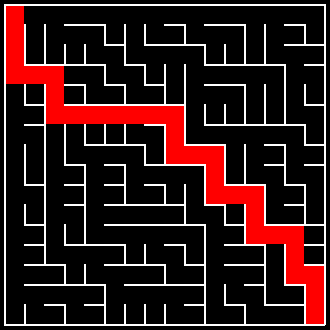

In [39]:
maze = Maze()
maze.load("BinaryTree_16x16.maze")

path, count = beam_search(maze, (0,0), (15,15), 7)
print(count)
maze.add_colors(path=path)
print(path)
display(maze.draw(cell_width=20))

## Beams Algorithm

    Beam search is an optimised best-first search algoritm using BFS. The algorithm chooses b most cost effective nodes to traverse through based on an heuristic function. Only these b (called beam width) nodes are stored in the priority queue.

    The heuristic function here needs to defined by us. For mazes one simple heuristic would be to based on the straight line distance from the choice nodes to the exit. b choice nodes with lowest distances will be chosen and stored in memory, the rest ignored.

    The beam width is also determined by the programmer, based on the heuristic function chosen. The value will be chosen based on prior testing of width values, to find which works best.

## Algorithm
    OPEN = {initial state} 
        while OPEN is not empty do 
            Remove the best node from OPEN, call it n. 
            If n is the goal state, backtrace path to n (through recorded parents) and return path.
            Create n's successors. 
            Evaluate each successor, add it to OPEN, and record its parent.
            If |OPEN| > b , take the best b nodes (according to heuristic) and remove the others from the OPEN. 
    done

### Completeness: Incomplete
    Since the the algorithm does not traverse all nodes, and instead takes a greedy strategy, it will not always find a solution.

### Complexity
    Time Complexity: O(b\*d) , where b = beam width, d = graph depth
    O(bd) is the worst case time complexity as at every level of the graph we may have to update the priority queue entirely, performing b operations at every level (total levels = d).

    Space Complexity: O(b) ,  b = beam width
    Space complexity is proportional to beam width as the priority queue is the only data structure that stores memory (apart from iterators and the like). Since the priority queue will have b elements, space taken will be proportional to b.